# 1. Load accuracy, params, loss from EfficientSU2 ANSATZ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os
from datetime import datetime


print("Loading QSVM results...")

# Find all result files
results_dir = "../results1"
result_files = glob.glob(os.path.join(results_dir, "qsvc_EfficientSU2_d1_*.npz"))

if len(result_files) == 0:
    print(f"No result files found in {results_dir}")
    print("Make sure you have run the QSVM experiments first")
else:
    print(f"Found {len(result_files)} result files")
    for f in result_files[:5]:  # Show first 5 files
        print(f"  - {os.path.basename(f)}")
    if len(result_files) > 5:
        print(f"  ... and {len(result_files)-5} more files")

Loading QSVM results...
Found 100 result files
  - qsvc_EfficientSU2_d1_run_100_20250927_150814.npz
  - qsvc_EfficientSU2_d1_run_10_20250927_150544.npz
  - qsvc_EfficientSU2_d1_run_11_20250927_150552.npz
  - qsvc_EfficientSU2_d1_run_12_20250927_150550.npz
  - qsvc_EfficientSU2_d1_run_13_20250927_150541.npz
  ... and 95 more files


In [2]:
# Load all results into a structured format
results_data = []

for file_path in result_files:
    try:
        # Load the .npz file
        data = np.load(file_path)
        
        # Extract information from filename
        filename = os.path.basename(file_path)
        # Expected format: qsvc_run_{run_id}_{timestamp}.npz
        parts = filename.replace('.npz', '').split('_')
        
        result_entry = {
            'filename': filename,
            'file_path': file_path,
            'run_id': int(data['run_id']) if 'run_id' in data else None,
            'accuracy': float(data['accuracy']) if 'accuracy' in data else None,
            'optimal_value': float(data['optimal_value']) if 'optimal_value' in data else None,
            'training_time': float(data['training_time']) if 'training_time' in data else None,
            'optimal_params': data['optimal_params'] if 'optimal_params' in data else None,
            'num_params': len(data['optimal_params']) if 'optimal_params' in data else None
        }
        
        # Try to parse timestamp from filename
        if len(parts) >= 4:
            timestamp_str = '_'.join(parts[3:5]) if len(parts) >= 5 else parts[3]
            try:
                result_entry['timestamp'] = datetime.strptime(timestamp_str, '%Y%m%d_%H%M%S')
            except:
                result_entry['timestamp'] = None
        
        results_data.append(result_entry)
        
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Convert to DataFrame for easier analysis
if results_data:
    df_results = pd.DataFrame(results_data)
    print(f"\nSuccessfully loaded {len(df_results)} results")
    print("\nDataFrame columns:", df_results.columns.tolist())
    print("\nFirst few rows:")
    print(df_results[['run_id', 'accuracy', 'optimal_value', 'training_time', 'num_params']].head())
else:
    print("No results were loaded successfully")


Successfully loaded 100 results

DataFrame columns: ['filename', 'file_path', 'run_id', 'accuracy', 'optimal_value', 'training_time', 'optimal_params', 'num_params', 'timestamp']

First few rows:
   run_id  accuracy  optimal_value  training_time  num_params
0     100  0.897059       0.092618      52.057384           4
1      10  0.830882      -0.601988      43.285549           4
2      11  0.772059      -1.158477      52.449103           4
3      12  0.463235      -5.867396      49.675723           4
4      13  0.830882       0.048082      41.737263           4
   run_id  accuracy  optimal_value  training_time  num_params
0     100  0.897059       0.092618      52.057384           4
1      10  0.830882      -0.601988      43.285549           4
2      11  0.772059      -1.158477      52.449103           4
3      12  0.463235      -5.867396      49.675723           4
4      13  0.830882       0.048082      41.737263           4


# 2. Statistical Analysis

In [3]:
if 'df_results' in locals() and len(df_results) > 0:
    print("QSVM Results Summary")
    print("=" * 50)
    
    # Basic statistics
    print(f"Total experiments: {len(df_results)}")
    print(f"Unique run IDs: {df_results['run_id'].nunique()}")
    
    # Accuracy statistics
    if df_results['accuracy'].notna().any():
        print(f"\nAccuracy Statistics:")
        print(f"  Mean: {df_results['accuracy'].mean():.4f}")
        print(f"  Std:  {df_results['accuracy'].std():.4f}")
        print(f"  Min:  {df_results['accuracy'].min():.4f}")
        print(f"  Max:  {df_results['accuracy'].max():.4f}")
        
    # Loss statistics
    if df_results['optimal_value'].notna().any():
        print(f"\nOptimal Value (Loss) Statistics:")
        print(f"  Mean: {df_results['optimal_value'].mean():.6f}")
        print(f"  Std:  {df_results['optimal_value'].std():.6f}")
        print(f"  Min:  {df_results['optimal_value'].min():.6f}")
        print(f"  Max:  {df_results['optimal_value'].max():.6f}")
        
    # Training time statistics
    if df_results['training_time'].notna().any():
        print(f"\nTraining Time Statistics:")
        print(f"  Mean: {df_results['training_time'].mean():.2f} seconds")
        print(f"  Std:  {df_results['training_time'].std():.2f} seconds")
        print(f"  Min:  {df_results['training_time'].min():.2f} seconds")
        print(f"  Max:  {df_results['training_time'].max():.2f} seconds")
        
    # Parameter statistics
    if df_results['num_params'].notna().any():
        print(f"\nParameter Statistics:")
        print(f"  Number of parameters per run: {df_results['num_params'].iloc[0]}")
        
    # Show best results
    if df_results['accuracy'].notna().any():
        best_idx = df_results['accuracy'].idxmax()
        print(f"\nBest Performance:")
        print(f"  Run ID: {df_results.loc[best_idx, 'run_id']}")
        print(f"  Accuracy: {df_results.loc[best_idx, 'accuracy']:.4f}")
        print(f"  Loss: {df_results.loc[best_idx, 'optimal_value']:.6f}")
        print(f"  Training Time: {df_results.loc[best_idx, 'training_time']:.2f} seconds")
        
else:
    print("No data available for analysis")

QSVM Results Summary
Total experiments: 100
Unique run IDs: 100

Accuracy Statistics:
  Mean: 0.6651
  Std:  0.1557
  Min:  0.4632
  Max:  0.9338

Optimal Value (Loss) Statistics:
  Mean: -1.595081
  Std:  2.681363
  Min:  -7.034886
  Max:  0.789796

Training Time Statistics:
  Mean: 75.92 seconds
  Std:  32.80 seconds
  Min:  39.08 seconds
  Max:  158.35 seconds

Parameter Statistics:
  Number of parameters per run: 4

Best Performance:
  Run ID: 31
  Accuracy: 0.9338
  Loss: -0.643892
  Training Time: 120.94 seconds


# 3. Visualization and Analysis

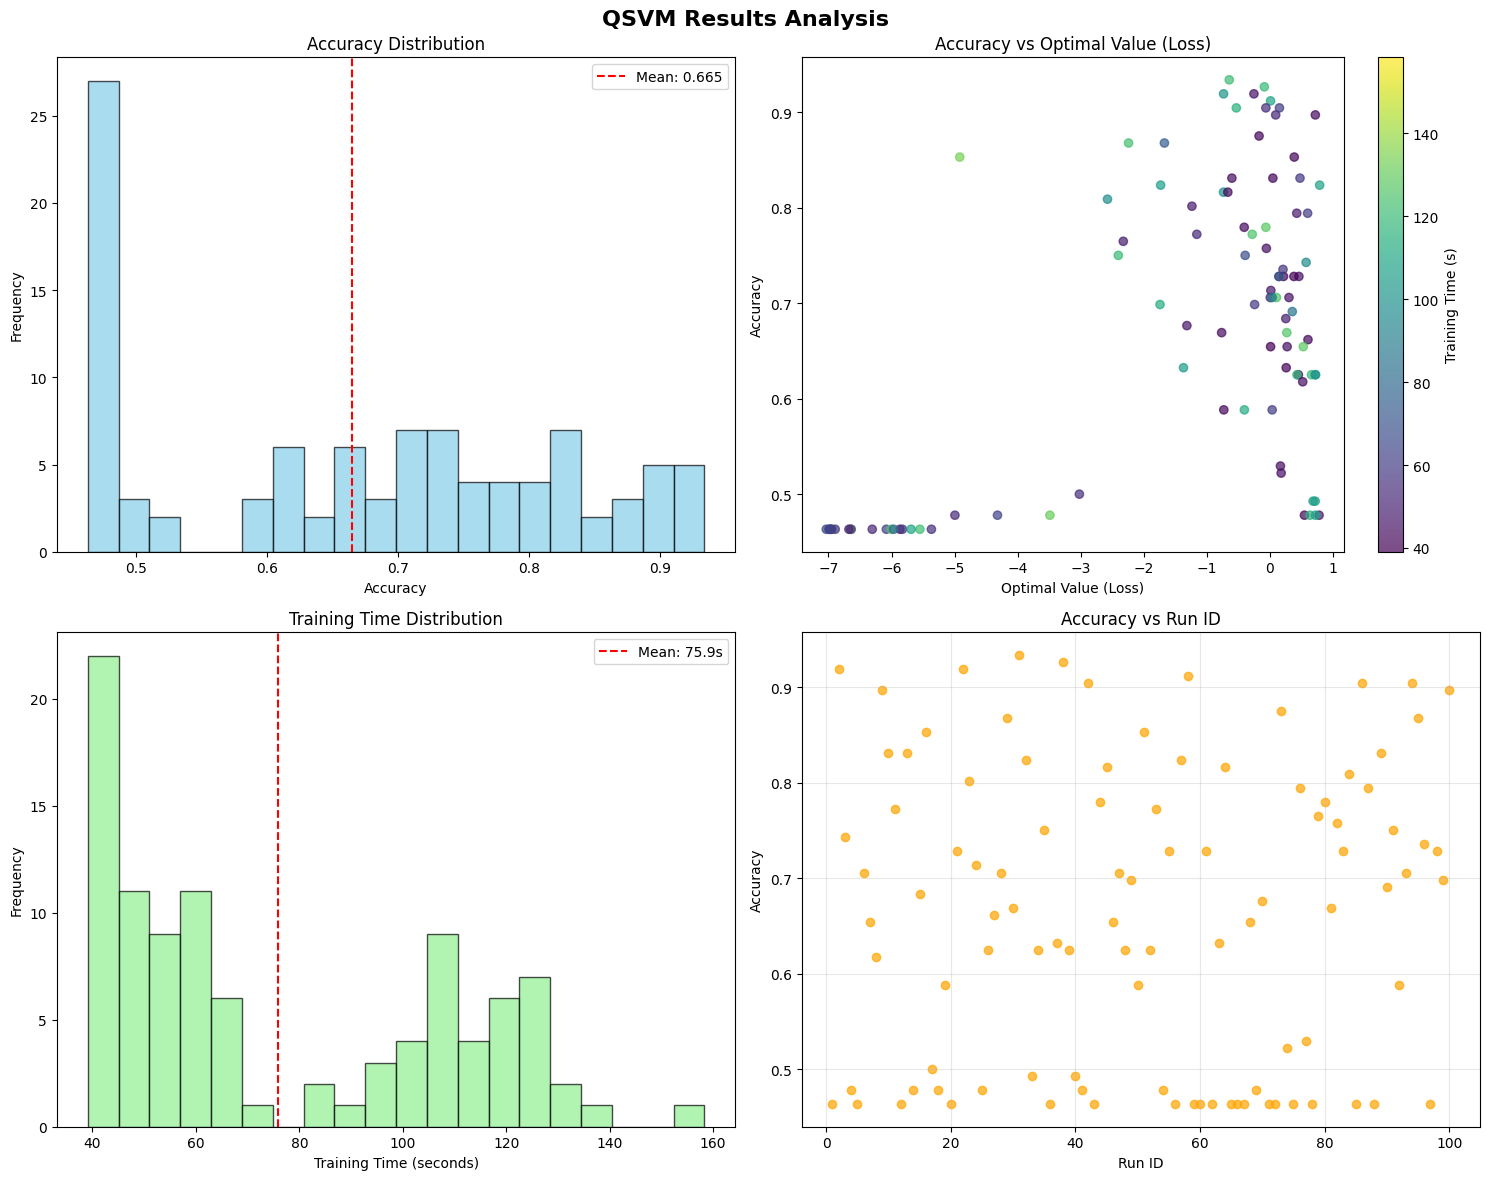

In [4]:
if 'df_results' in locals() and len(df_results) > 0:
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('QSVM Results Analysis', fontsize=16, fontweight='bold')
    
    # Plot 1: Accuracy distribution
    if df_results['accuracy'].notna().any():
        axes[0, 0].hist(df_results['accuracy'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Accuracy Distribution')
        axes[0, 0].set_xlabel('Accuracy')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].axvline(df_results['accuracy'].mean(), color='red', linestyle='--', 
                          label=f'Mean: {df_results["accuracy"].mean():.3f}')
        axes[0, 0].legend()
    
    # Plot 2: Loss vs Accuracy scatter
    if df_results['accuracy'].notna().any() and df_results['optimal_value'].notna().any():
        scatter = axes[0, 1].scatter(df_results['optimal_value'], df_results['accuracy'], 
                                   alpha=0.7, c=df_results['training_time'], cmap='viridis')
        axes[0, 1].set_title('Accuracy vs Optimal Value (Loss)')
        axes[0, 1].set_xlabel('Optimal Value (Loss)')
        axes[0, 1].set_ylabel('Accuracy')
        plt.colorbar(scatter, ax=axes[0, 1], label='Training Time (s)')
    
    # Plot 3: Training time distribution
    if df_results['training_time'].notna().any():
        axes[1, 0].hist(df_results['training_time'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[1, 0].set_title('Training Time Distribution')
        axes[1, 0].set_xlabel('Training Time (seconds)')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].axvline(df_results['training_time'].mean(), color='red', linestyle='--',
                          label=f'Mean: {df_results["training_time"].mean():.1f}s')
        axes[1, 0].legend()
    
    # Plot 4: Accuracy vs Run ID (if multiple runs)
    if df_results['run_id'].nunique() > 1:
        axes[1, 1].scatter(df_results['run_id'], df_results['accuracy'], alpha=0.7, color='orange')
        axes[1, 1].set_title('Accuracy vs Run ID')
        axes[1, 1].set_xlabel('Run ID')
        axes[1, 1].set_ylabel('Accuracy')
        axes[1, 1].grid(True, alpha=0.3)
    else:
        # If only one run ID, show parameter analysis
        axes[1, 1].text(0.5, 0.5, f'Single Run Analysis\nRun ID: {df_results["run_id"].iloc[0]}\nAccuracy: {df_results["accuracy"].iloc[0]:.4f}', 
                        transform=axes[1, 1].transAxes, ha='center', va='center', fontsize=12,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        axes[1, 1].set_title('Single Run Summary')
        axes[1, 1].set_xticks([])
        axes[1, 1].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No data available for visualization")

C:\Users\Nguyen Dinh Quyen\AppData\Local\Temp\ipykernel_22248\2249652055.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(df_results['optimal_value'], df_results['accuracy'],
C:\Users\Nguyen Dinh Quyen\AppData\Local\Temp\ipykernel_22248\2249652055.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


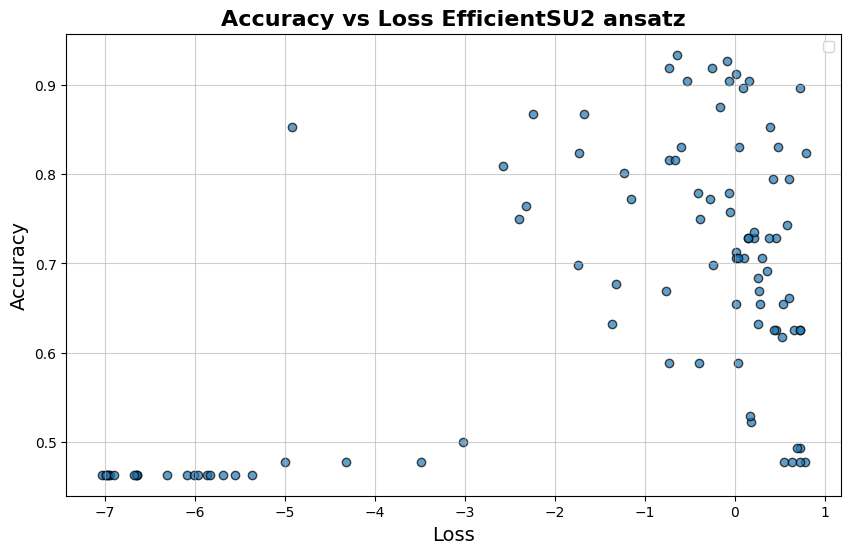

In [5]:
# Scatter plot of accuracy vs loss

if 'df_results' in locals() and len(df_results) > 0:
	plt.figure(figsize=(10, 6))
	scatter = plt.scatter(df_results['optimal_value'], df_results['accuracy'], 
						  alpha=0.7, cmap='plasma', edgecolor='k')
	plt.title('Accuracy vs Loss EfficientSU2 ansatz', fontsize=16, fontweight='bold')
	plt.xlabel('Loss', fontsize=14)
	plt.ylabel('Accuracy', fontsize=14)
	plt.grid(True, alpha=0.6)
	plt.legend()
	plt.savefig('../results_img/qsvc_EfficientSU2_d1_accuracy_vs_loss.png', dpi=300)
	plt.show()

# 4. Parameter Analysis

Parameter Analysis
Best performing run (Run ID: 31):
  Accuracy: 0.9338
  Number of parameters: 4
  Parameter range: [-1.9685, 2.5254]
  Parameter mean: 1.0063
  Parameter std: 1.7863


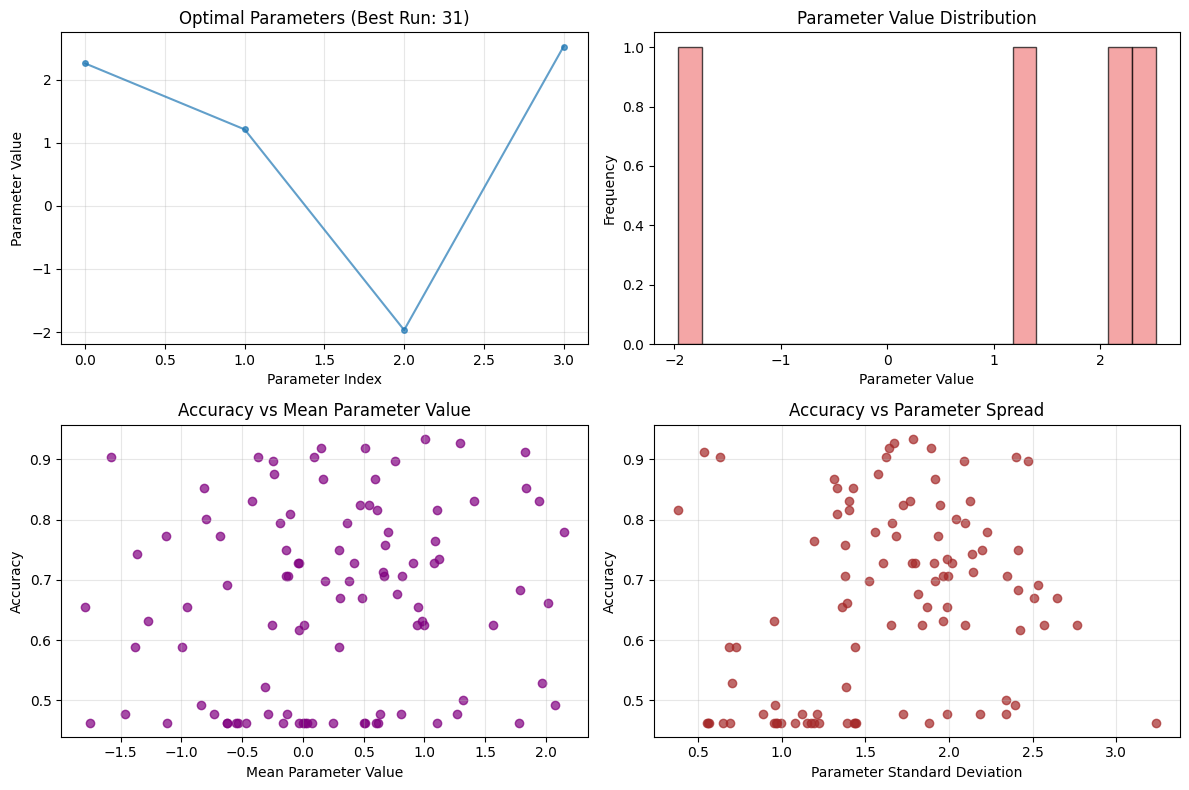

In [6]:
if 'df_results' in locals() and len(df_results) > 0 and df_results['optimal_params'].notna().any():
    
    # Analyze optimal parameters
    print("Parameter Analysis")
    print("=" * 50)
    
    # Get the best performing run
    best_idx = df_results['accuracy'].idxmax()
    best_params = df_results.loc[best_idx, 'optimal_params']
    
    print(f"Best performing run (Run ID: {df_results.loc[best_idx, 'run_id']}):")
    print(f"  Accuracy: {df_results.loc[best_idx, 'accuracy']:.4f}")
    print(f"  Number of parameters: {len(best_params)}")
    print(f"  Parameter range: [{best_params.min():.4f}, {best_params.max():.4f}]")
    print(f"  Parameter mean: {best_params.mean():.4f}")
    print(f"  Parameter std: {best_params.std():.4f}")
    
    # Visualize parameters for best run
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(best_params, 'o-', alpha=0.7, markersize=4)
    plt.title(f'Optimal Parameters (Best Run: {df_results.loc[best_idx, "run_id"]})')
    plt.xlabel('Parameter Index')
    plt.ylabel('Parameter Value')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 2)
    plt.hist(best_params, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.title('Parameter Value Distribution')
    plt.xlabel('Parameter Value')
    plt.ylabel('Frequency')
    
    # If we have multiple runs, compare parameter statistics
    if len(df_results) > 1:
        plt.subplot(2, 2, 3)
        param_means = [params.mean() for params in df_results['optimal_params'] if params is not None]
        param_stds = [params.std() for params in df_results['optimal_params'] if params is not None]
        
        plt.scatter(param_means, df_results['accuracy'][:len(param_means)], alpha=0.7, color='purple')
        plt.xlabel('Mean Parameter Value')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs Mean Parameter Value')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(2, 2, 4)
        plt.scatter(param_stds, df_results['accuracy'][:len(param_stds)], alpha=0.7, color='brown')
        plt.xlabel('Parameter Standard Deviation')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs Parameter Spread')
        plt.grid(True, alpha=0.3)
    else:
        # Single run - show parameter correlations or patterns
        plt.subplot(2, 2, 3)
        plt.text(0.5, 0.5, 'Single Run\nParameter Analysis', 
                transform=plt.gca().transAxes, ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        
        plt.subplot(2, 2, 4)
        # Show parameter evolution (if parameters have structure)
        if len(best_params) > 10:
            # Group parameters and show their patterns
            group_size = len(best_params) // 4
            groups = [best_params[i:i+group_size] for i in range(0, len(best_params), group_size)]
            group_means = [g.mean() for g in groups if len(g) > 0]
            plt.plot(group_means, 'o-', color='darkgreen', linewidth=2)
            plt.title('Parameter Groups Average')
            plt.xlabel('Parameter Group')
            plt.ylabel('Average Value')
        else:
            plt.bar(range(len(best_params)), best_params, alpha=0.7, color='darkblue')
            plt.title('Individual Parameter Values')
            plt.xlabel('Parameter Index')
            plt.ylabel('Parameter Value')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No parameter data available for analysis")

# 5. Export Analysis Results

In [ ]:
if 'df_results' in locals() and len(df_results) > 0:
    # Create a summary report
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Export summary to CSV (excluding the actual parameter arrays for CSV)
    csv_data = df_results[['run_id', 'accuracy', 'optimal_value', 'training_time', 'num_params', 'timestamp']].copy()
    csv_filename = f"../results/qsvm_EfficientSU2_d1_summary_{timestamp}.csv"
    csv_data.to_csv(csv_filename, index=False)
    print(f"Summary exported to: {csv_filename}")
    
    # Export detailed results including parameters to .npz
    analysis_results = {
        'summary_stats': {
            'total_experiments': len(df_results),
            'mean_accuracy': df_results['accuracy'].mean() if df_results['accuracy'].notna().any() else None,
            'std_accuracy': df_results['accuracy'].std() if df_results['accuracy'].notna().any() else None,
            'best_accuracy': df_results['accuracy'].max() if df_results['accuracy'].notna().any() else None,
            'mean_training_time': df_results['training_time'].mean() if df_results['training_time'].notna().any() else None,
            'analysis_timestamp': timestamp
        },
        'all_accuracies': df_results['accuracy'].values,
        'all_losses': df_results['optimal_value'].values,
        'all_training_times': df_results['training_time'].values,
        'run_ids': df_results['run_id'].values
    }
    
    # Add best parameters if available
    if df_results['optimal_params'].notna().any():
        best_idx = df_results['accuracy'].idxmax()
        analysis_results['best_parameters'] = df_results.loc[best_idx, 'optimal_params']
        analysis_results['best_run_id'] = df_results.loc[best_idx, 'run_id']

    npz_filename = f"../results/qsvm_EfficientSU2_d1_detailed_{timestamp}.npz"
    np.savez(npz_filename, **analysis_results)
    print(f"Detailed analysis exported to: {npz_filename}")
    
    # Print final summary
    print(f"\nAnalysis Complete!")
    print(f"=" * 50)
    print(f"Analyzed {len(df_results)} QSVM experiments")
    if df_results['accuracy'].notna().any():
        print(f"Best accuracy achieved: {df_results['accuracy'].max():.4f}")
        print(f"Average accuracy: {df_results['accuracy'].mean():.4f} ± {df_results['accuracy'].std():.4f}")
    print(f"Results exported to:")
    print(f"  - {csv_filename}")
    print(f"  - {npz_filename}")
    
else:
    print("No results available to export")

Summary exported to: ../results/qsvm_analysis_summary_20250919_214112.csv
Detailed analysis exported to: ../results/qsvm_analysis_detailed_20250919_214112.npz

Analysis Complete!
Analyzed 100 QSVM experiments
Best accuracy achieved: 0.9559
Average accuracy: 0.7689 ± 0.1260
Results exported to:
  - ../results/qsvm_analysis_summary_20250919_214112.csv
  - ../results/qsvm_analysis_detailed_20250919_214112.npz
